In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def parse_log(fn):
    ls = [l.strip().split() for l in open(fn).readlines() if l.startswith("metrics")]
    ls = [(float(l[1]), float(l[4]), float(l[7]), float(l[9]), float(l[11]), float(l[13])) for l in ls]
    return ls

In [48]:
ls = parse_log("../log_nt16_cuda_c1.txt")
ls2 = parse_log("../log_nt16.txt")

In [101]:
def get_analyze_speed(fn):
    vs = [float(l.split()[9]) for l in open(fn).readlines() if l.startswith("analyze")]
    return vs

def get_cache_load_speed(fn):
    vs = [float(l.split()[10]) for l in open(fn).readlines() if l.startswith("from_cache")]
    return vs

In [102]:
vs = get_analyze_speed("../log_nt16_cuda_c1.txt")
vs2 = get_analyze_speed("../log_nt16.txt")

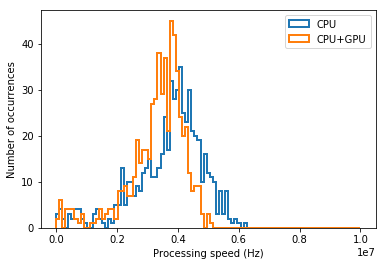

In [117]:
bins = np.linspace(0,1e7,100)
plt.hist(vs2, bins=bins, histtype="step", lw=2, label="CPU");
plt.hist(vs, bins=bins, histtype="step", lw=2, label="CPU+GPU");
plt.xlabel("Processing speed (Hz)")
plt.ylabel("Number of occurrences")
plt.legend()

In [110]:
vs = get_cache_load_speed("../log_nt16_cuda_c1.txt")
vs2 = get_cache_load_speed("../log_nt16.txt")

Text(0, 0.5, 'Number of occurrences')

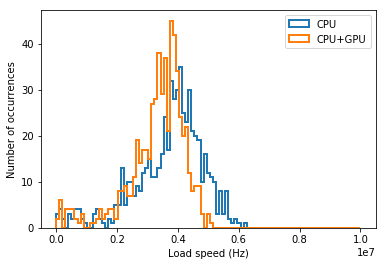

In [111]:
bins = np.linspace(0,1e7,100)
plt.hist(vs2, bins=bins, histtype="step", lw=2, label="CPU");
plt.hist(vs, bins=bins, histtype="step", lw=2, label="CPU+GPU");
plt.legend()

plt.xlabel("Load speed (Hz)")
plt.ylabel("Number of occurrences")

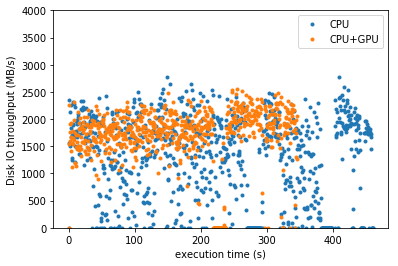

In [112]:
plt.plot([l[0] - ls2[0][0] for l in ls2], [l[1] for l in ls2], marker=".", lw=0, label="CPU")
plt.plot([l[0] - ls[0][0] for l in ls], [l[1] for l in ls], marker=".", lw=0, label="CPU+GPU")
plt.ylabel("Disk IO throughput (MB/s)")
plt.xlabel("execution time (s)")
plt.ylim(0,4000)
plt.legend()

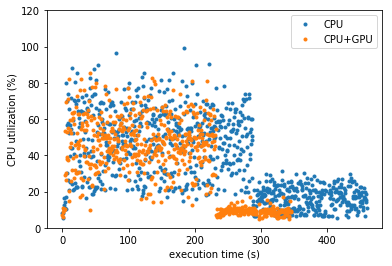

In [113]:
plt.plot([l[0] - ls2[0][0] for l in ls2], [l[2] for l in ls2], marker=".", lw=0, label="CPU")
plt.plot([l[0] - ls[0][0] for l in ls], [l[2] for l in ls], marker=".", lw=0, label="CPU+GPU")
plt.ylabel("CPU utilization (%)")
plt.xlabel("execution time (s)")
plt.ylim(0,120)
plt.legend()

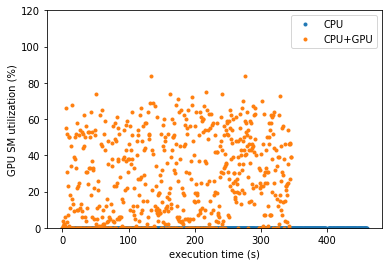

In [114]:
plt.plot([l[0] - ls2[0][0] for l in ls2], [l[3] for l in ls2], marker=".", lw=0, label="CPU")
plt.plot([l[0] - ls[0][0] for l in ls], [l[3] for l in ls], marker=".", lw=0, label="CPU+GPU")
plt.ylabel("GPU SM utilization (%)")
plt.xlabel("execution time (s)")
plt.ylim(0,120)
plt.legend()

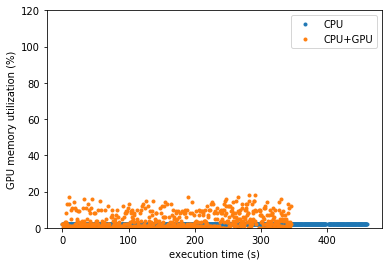

In [115]:
plt.plot([l[0] - ls2[0][0] for l in ls2], [l[4] for l in ls2], marker=".", lw=0, label="CPU")
plt.plot([l[0] - ls[0][0] for l in ls], [l[4] for l in ls], marker=".", lw=0, label="CPU+GPU")

plt.ylabel("GPU memory utilization (%)")
plt.xlabel("execution time (s)")
plt.ylim(0,120)
plt.legend()


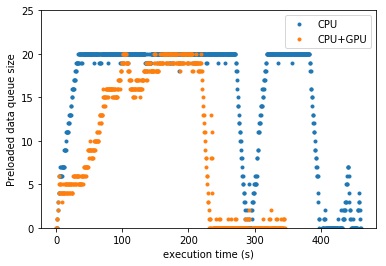

In [116]:
plt.plot([l[0] - ls2[0][0] for l in ls2], [l[5] for l in ls2], marker=".", lw=0, label="CPU")
plt.plot([l[0] - ls[0][0] for l in ls], [l[5] for l in ls], marker=".", lw=0, label="CPU+GPU")

plt.ylabel("Preloaded data queue size")
plt.xlabel("execution time (s)")
plt.ylim(0,25)
plt.legend()